In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
Name: count, dtype: int64

## Checking the distribution of the data:

In [7]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
no_fraud = round(classes[0]/df['Class'].count()*100,2)
no_fraud

np.float64(99.83)

In [9]:
fraud = round(classes[1]/df['Class'].count()*100,2)
fraud

np.float64(0.17)

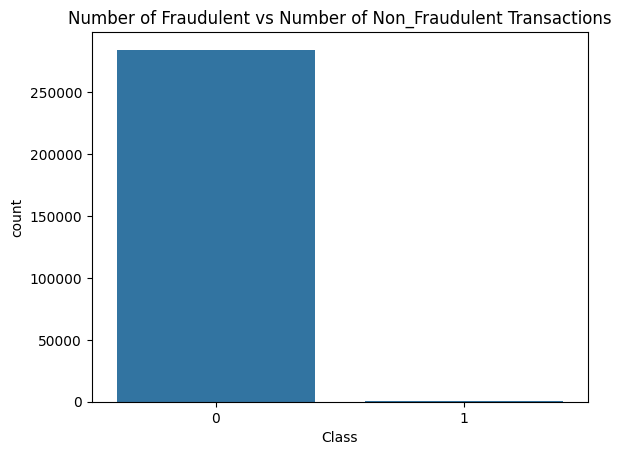

In [10]:
sns.countplot(x = 'Class', data=df)
plt.title('Number of Fraudulent vs Number of Non_Fraudulent Transactions')
plt.show()

### Distribution of classes with respect to time:

In [11]:
fraud_data = df[df['Class'] == 1] # Fraudalent Dataframe
no_fraud_data = df[df['Class'] == 0] # Non Fraudalent Data frame

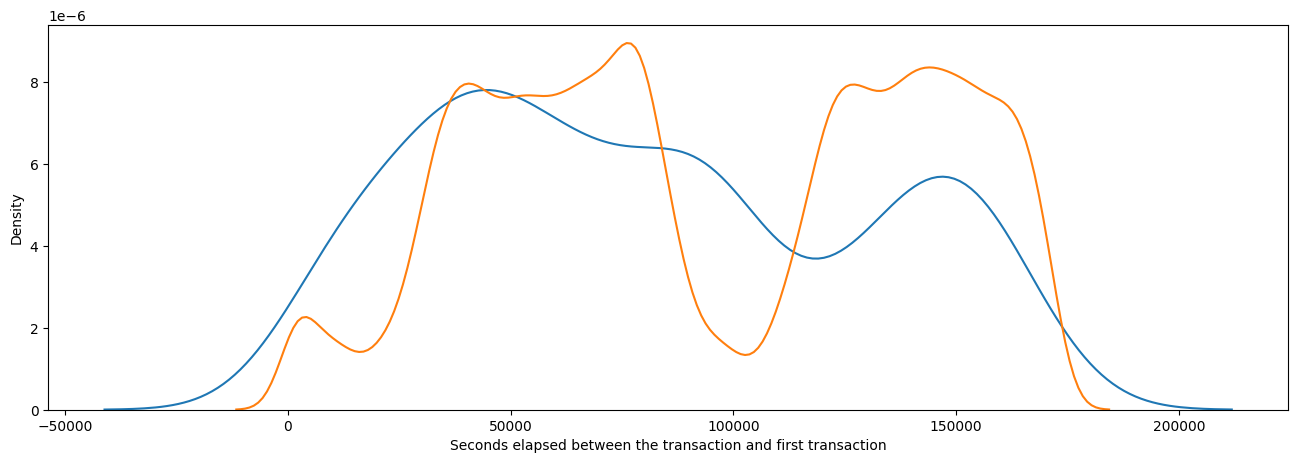

In [12]:
plt.figure(figsize = (16,5))
ax = sns.distplot(fraud_data['Time'], label = 'Fraudalent Transaction', hist = False) # Blue
ax = sns.distplot(no_fraud_data['Time'], label = 'Non Fraudalent Transaction', hist = False) # Orange

ax.set(xlabel = 'Seconds elapsed between the transaction and first transaction')
plt.show()

### How is my fraudulent and non fraudulent transaction amount is spread out

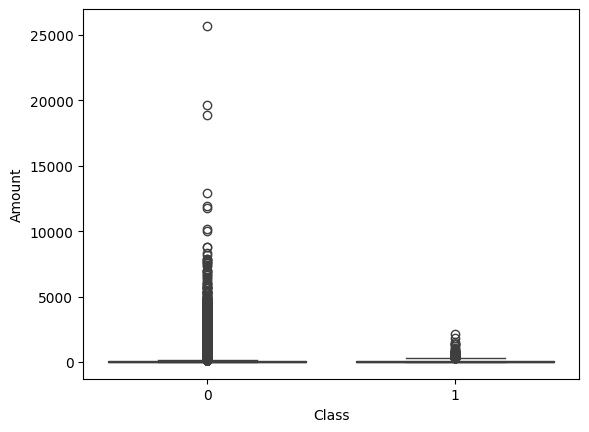

In [13]:
sns.boxplot(y='Amount', x = 'Class', data = df)
plt.show()

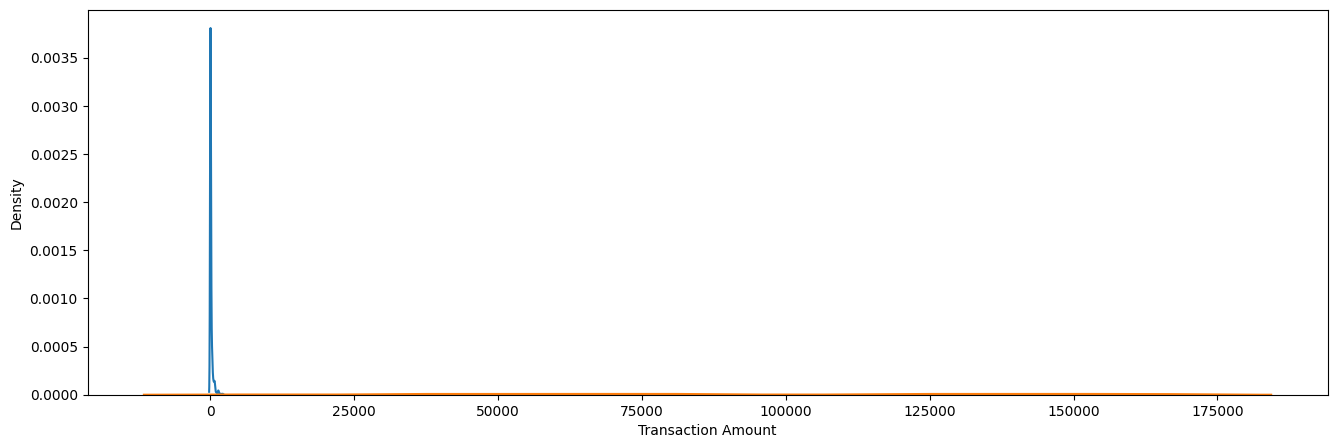

In [14]:
plt.figure(figsize = (16,5))
ax = sns.distplot(fraud_data['Amount'], label = 'Fraudalent Transaction', hist = False) # Blue
ax = sns.distplot(no_fraud_data['Time'], label = 'Non Fraudalent Transaction', hist = False) # Orange

ax.set(xlabel = 'Transaction Amount')
plt.show()

## Train Test Split: 

In [15]:
df= df.drop(columns=['Time'], axis=1)

In [16]:
X = df.drop(['Class'], axis=1)
y= df[['Class']]

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [ ]:
##########################################################################

## K-Means Clustering(Added Later)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [23]:
pd.DataFrame(kmeans.labels_)[0].value_counts()

0
0    150063
1    134744
Name: count, dtype: int64

In [24]:
pred = kmeans.labels_

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

In [26]:
print(confusion_matrix(y,pred))

[[149705 134610]
 [   358    134]]


In [28]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69    284315
           1       0.00      0.27      0.00       492

    accuracy                           0.53    284807
   macro avg       0.50      0.40      0.35    284807
weighted avg       1.00      0.53      0.69    284807



### ELBOW METHOD:
Use to determine the optimal number of clusters (K).

The elbow might not always be clearly defined, making the decision subjective.

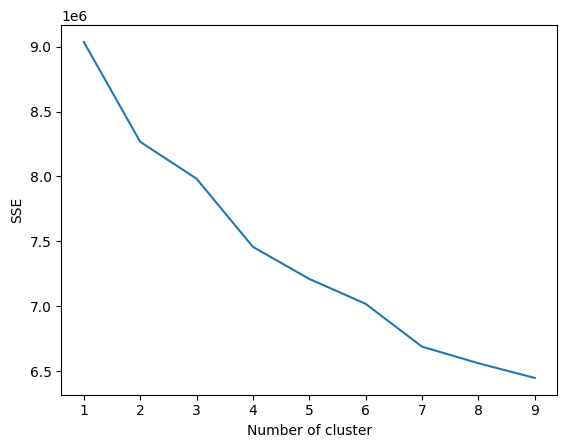

In [29]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### the elbow point is considered to be optimum number of clusters.

## SILHOUETTE SCORE:

In [31]:
silhouette_score(X, kmeans.fit_predict(X))

np.float64(0.14768165310339607)

In [ ]:
########################################################################################

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
y_train.value_counts()

Class
0        199008
1           356
Name: count, dtype: int64

In [19]:
y_test.value_counts()

Class
0        85307
1          136
Name: count, dtype: int64

## SCALING MY FEATURES: 1.MinMaxScaling 2.Standard Scaling --> Explained in notes.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,...,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,-0.339748
247823,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,...,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,4.277740
152342,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,...,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,-0.053399
103385,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,...,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,-0.335956
8771,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,...,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,-0.199244


In [23]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.065644
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.669027
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.223661
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.337813
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.340173


## Checking the Skewness in Data:

In [24]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

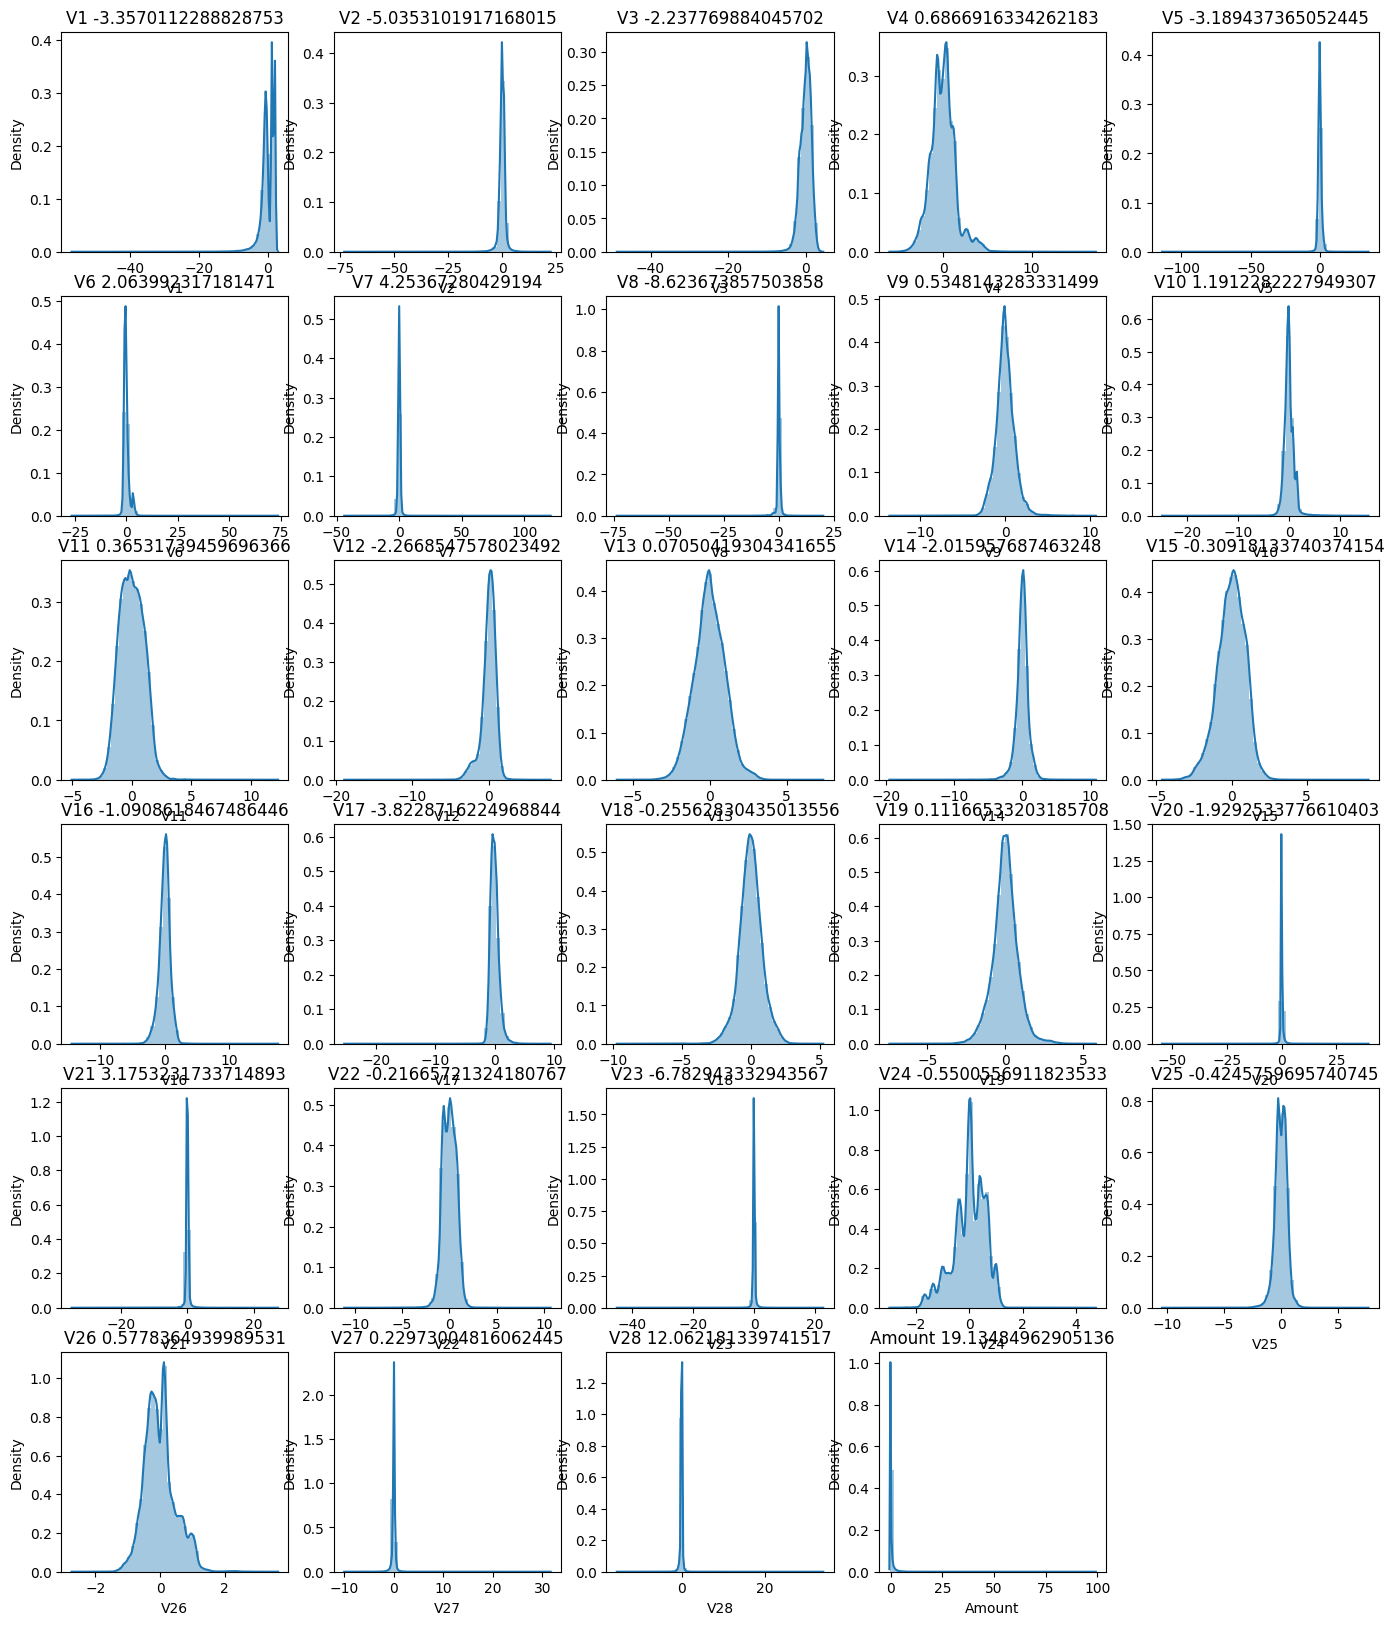

In [25]:
k = 0
plt.figure(figsize=(17,20))

for col in cols:
    k = k+1
    plt.subplot(6,5, k)
    sns.distplot(X_train[col])
    plt.title(col + ' ' + str(X_train[col].skew()))

## MITIGATING SKEWNESS OF DATA:

In [26]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

In [27]:
X_test[cols] = pt.transform(X_test)

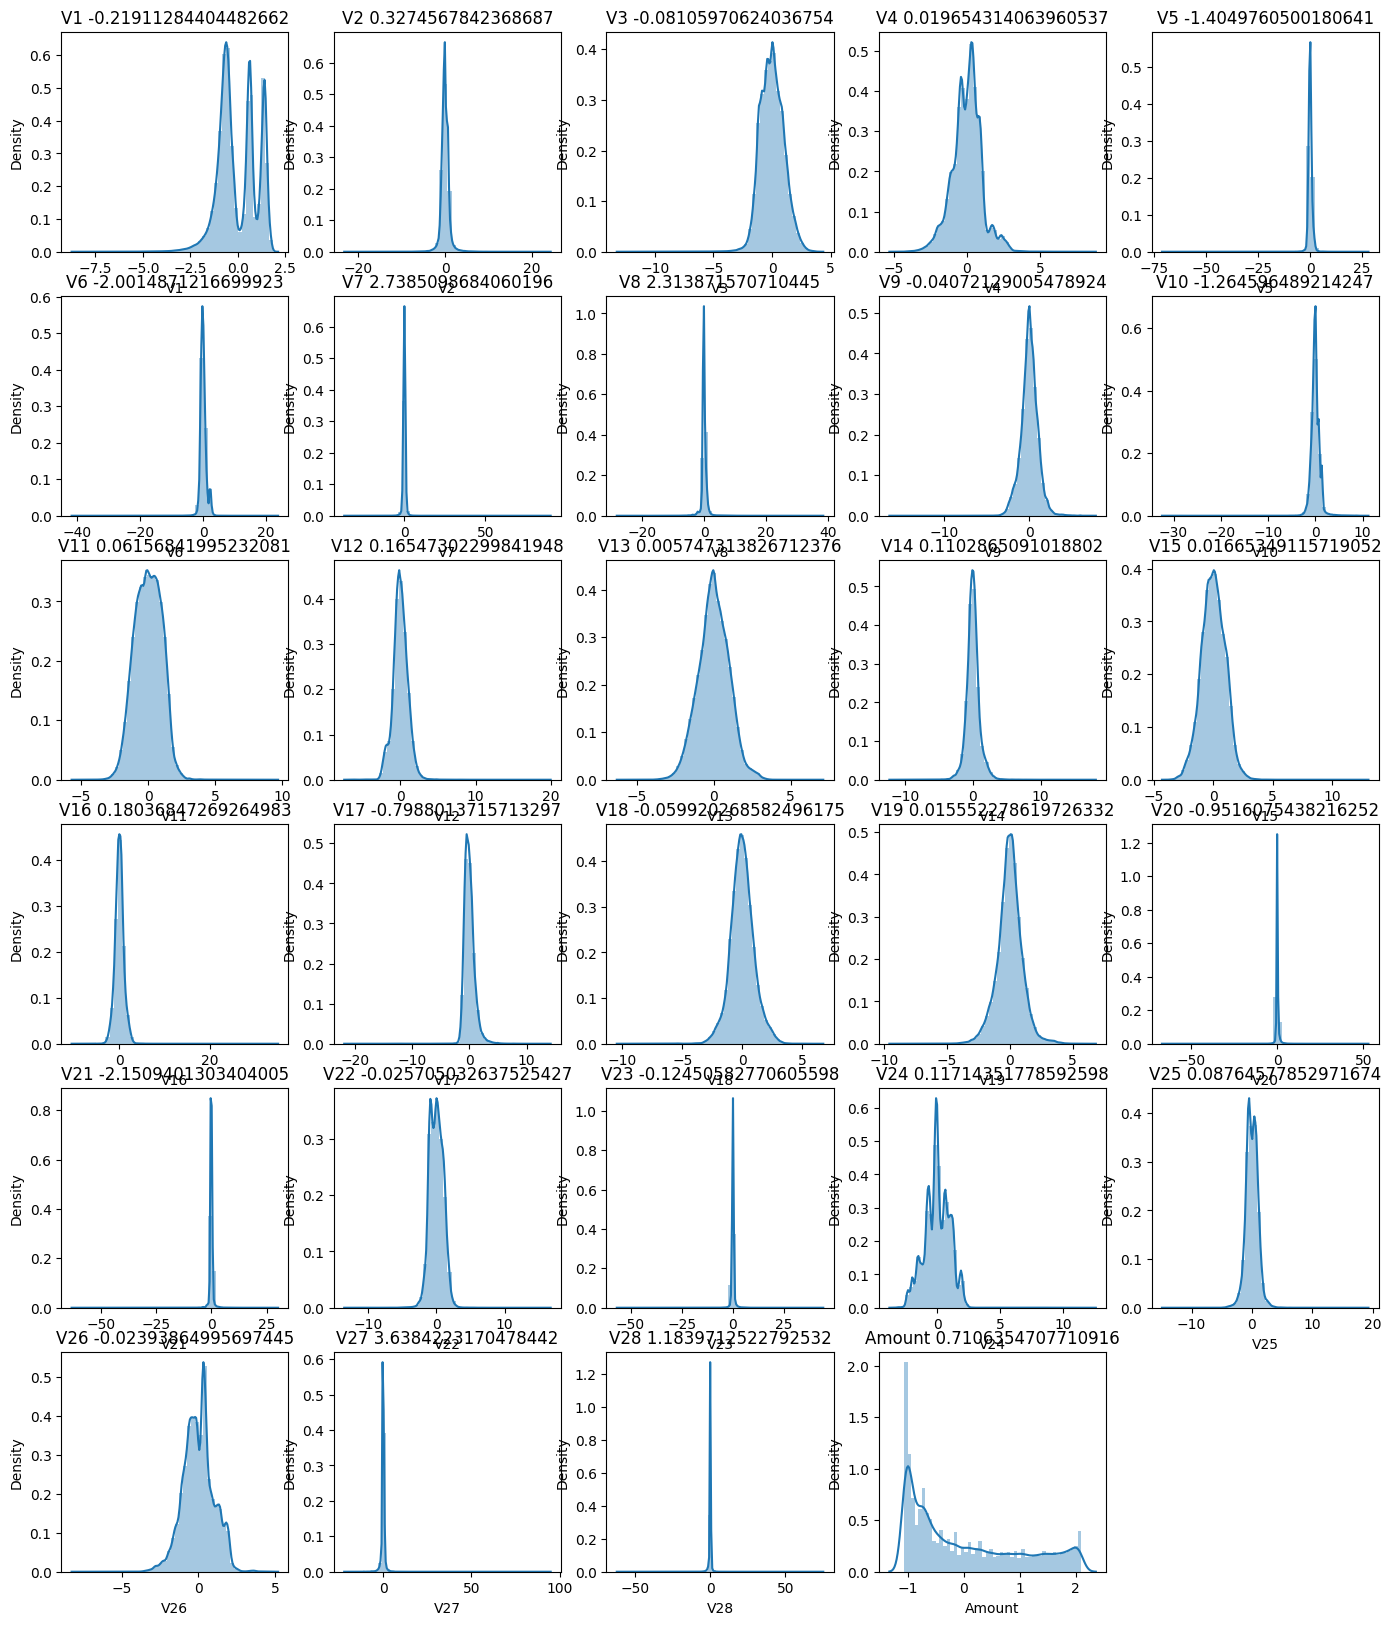

In [28]:
# Plotting after mitigating skewness:

k = 0
plt.figure(figsize=(17,20))

for col in cols:
    k = k+1
    plt.subplot(6,5, k)
    sns.distplot(X_train[col])
    plt.title(col + ' ' + str(X_train[col].skew()))

## Model 1: Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

 


In [41]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
logreg_pred_test = logreg.predict(X_test)
logreg_pred_train = logreg.predict(X_train)

Train Data: 
[[198980     28]
 [   127    229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.89      0.64      0.75       356

    accuracy                           1.00    199364
   macro avg       0.95      0.82      0.87    199364
weighted avg       1.00      1.00      1.00    199364

****************************************************************************************************
Test Data: 
[[85294    13]
 [   47    89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.65      0.75       136

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443

****************************************************************************************************
AUPRC CURVE:


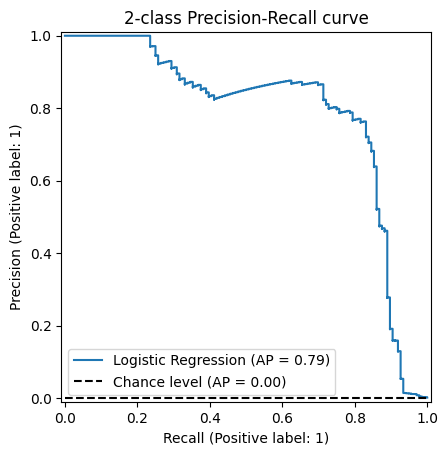

In [43]:
print('Train Data: ')
print(confusion_matrix(y_train,logreg_pred_train ))
print(classification_report(y_train,logreg_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,logreg_pred_test ))
print(classification_report(y_test,logreg_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [44]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-c

## CROSS VALIDATION ON LOGISTIC REGRESSION:

In [48]:

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

folds = KFold(n_splits=5, shuffle=True, random_state=42)

params = {"C" : [0.01, 0.1, 1, 10, 100, 1000 ]}

model1_logreg_cv = GridSearchCV(estimator=LogisticRegression(solver='saga'), param_grid = params, cv=folds, verbose=1, return_train_score=True)

model1_logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=1)

In [49]:
cv_results = pd.DataFrame(model1_logreg_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.487519,0.467892,0.014042,0.003295,0.01,{'C': 0.01},0.999298,0.999223,0.998947,0.999047,...,0.999132,0.000124,6,0.999116,0.999110,0.999216,0.999154,0.999160,0.999151,0.000038
1,10.449976,0.712311,0.014113,0.001516,0.10,{'C': 0.1},0.999273,0.999298,0.998972,0.999147,...,0.999177,0.000116,1,0.999154,0.999135,0.999266,0.999179,0.999179,0.999182,0.000045
2,10.106431,0.241247,0.019214,0.008921,1.00,{'C': 1},0.999273,0.999298,0.998972,0.999147,...,0.999177,0.000116,1,0.999154,0.999141,0.999266,0.999179,0.999179,0.999184,0.000044
3,10.095150,0.156254,0.014377,0.002023,10.00,{'C': 10},0.999273,0.999298,0.998972,0.999147,...,0.999177,0.000116,1,0.999154,0.999141,0.999266,0.999179,0.999179,0.999184,0.000044
4,10.430538,0.175241,0.014429,0.001428,100.00,{'C': 100},0.999273,0.999298,0.998972,0.999147,...,0.999177,0.000116,1,0.999154,0.999141,0.999266,0.999179,0.999179,0.999184,0.000044
5,10.175325,0.240734,0.016040,0.003494,1000.00,{'C': 1000},0.999273,0.999298,0.998972,0.999147,...,0.999177,0.000116,1,0.999154,0.999141,0.999266,0.999179,0.999179,0.999184,0.000044


## Model 2 : XGBoost 

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_class = XGBClassifier()

xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
xgb_class_pred_test = xgb_class.predict(X_test)
xgb_class_pred_train =xgb_class.predict(X_train)

Train Data: 
[[199008      0]
 [     0    356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      1.00      1.00       356

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

****************************************************************************************************
Test Data: 
[[85299     8]
 [   25   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

****************************************************************************************************
AUPRC CURVE:


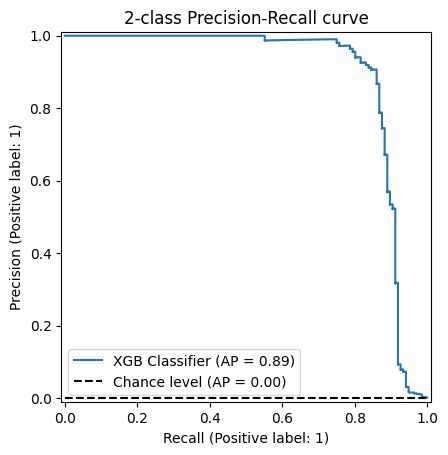

In [53]:
print('Train Data: ')
print(confusion_matrix(y_train,xgb_class_pred_train ))
print(classification_report(y_train,xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,xgb_class_pred_test ))
print(classification_report(y_test,xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_class, X_test, y_test, name="XGB Classifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [54]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

In [55]:
folds = 3

param_grid = {'learning_rate': [0.1,0.2,0.6],
             'max_depth': [3,5,7,9],
             'subsample': [0.3,0.6,0.9]}

xgb_model = XGBClassifier(n_estimators=200)

model_cv = GridSearchCV(
    estimator=xgb_model,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv=folds,
    verbose=1,
    return_train_score=True
)

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.6],
                         'max_depth': [3, 5, 7, 9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.692278,0.201657,0.158328,0.064123,0.1,3,0.3,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.977293,0.983493,0.983560,0.981449,0.002939,1,0.999901,0.999804,0.999831,0.999846,4.074459e-05
1,2.519881,0.113838,0.109107,0.002149,0.1,3,0.6,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.977832,0.975926,0.982685,0.978814,0.002845,10,0.999983,0.999987,0.999968,0.999979,7.879211e-06
2,2.835911,0.300532,0.123299,0.013476,0.1,3,0.9,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.977120,0.978469,0.981979,0.979189,0.002048,7,0.999975,0.999981,0.999975,0.999977,2.584958e-06
3,3.627476,0.195402,0.188469,0.041450,0.1,5,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.974029,0.976046,0.986493,0.978856,0.005463,9,0.999983,0.999978,0.999982,0.999981,1.864592e-06
4,3.898288,0.480686,0.183601,0.002509,0.1,5,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.974045,0.980145,0.981575,0.978588,0.003265,14,1.000000,1.000000,1.000000,1.000000,2.985847e-08
5,3.551478,0.020228,0.179094,0.001061,0.1,5,0.9,"{'learning_rate': 0.1, 'max_depth': 5, 'subsam...",0.976459,0.981362,0.983739,0.980520,0.003031,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,3.664595,0.416542,0.166345,0.004082,0.1,7,0.3,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.975647,0.982538,0.985072,0.981086,0.003983,2,0.999983,0.999983,0.999979,0.999982,1.731503e-06
7,3.928617,0.304733,0.191412,0.001883,0.1,7,0.6,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.969807,0.980403,0.983536,0.977915,0.005874,17,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,4.208617,0.463372,0.197967,0.000386,0.1,7,0.9,"{'learning_rate': 0.1, 'max_depth': 7, 'subsam...",0.977598,0.976268,0.980729,0.978198,0.001870,16,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,3.738018,0.334424,0.175351,0.011729,0.1,9,0.3,"{'learning_rate': 0.1, 'max_depth': 9, 'subsam...",0.974705,0.976014,0.987066,0.979262,0.005545,6,0.999987,0.999985,0.999979,0.999984,3.579532e-06


In [57]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.3}

In [58]:
xgb_grid = XGBClassifier(learning_rate= 0.1, max_depth= 3, subsample= 0.3)

xgb_grid.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Data: 
[[198993     15]
 [    64    292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.95      0.82      0.88       356

    accuracy                           1.00    199364
   macro avg       0.98      0.91      0.94    199364
weighted avg       1.00      1.00      1.00    199364

****************************************************************************************************
Test Data: 
[[85300     7]
 [   23   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

****************************************************************************************************
AUPRC CURVE:


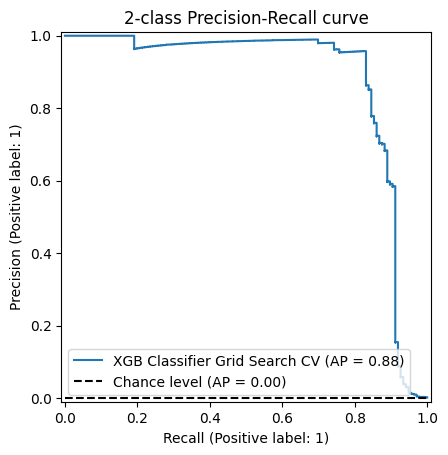

In [60]:
xgb_class_pred_test = xgb_grid.predict(X_test)
xgb_class_pred_train =xgb_grid.predict(X_train)

print('Train Data: ')
print(confusion_matrix(y_train,xgb_class_pred_train ))
print(classification_report(y_train,xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,xgb_class_pred_test ))
print(classification_report(y_test,xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_grid, X_test, y_test, name="XGB Classifier Grid Search CV", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Over and UnderSampling 

In [61]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 279.3 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 297.7 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 351.4 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 327.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 363.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 404.6 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.3 kB 419.0 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 444.2 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 5

In [62]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [64]:
y_train_rus.value_counts()

Class
0        356
1        356
Name: count, dtype: int64

## Undersampled data in Benchmark model : Logreg

In [67]:
logreg = LogisticRegression()

logreg.fit(X_train_rus,y_train_rus)

LogisticRegression()

In [68]:
logreg_pred_test = logreg.predict(X_test)
logreg_pred_train = logreg.predict(X_train_rus)

Train Data: 
[[348   8]
 [ 32 324]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       356
           1       0.98      0.91      0.94       356

    accuracy                           0.94       712
   macro avg       0.95      0.94      0.94       712
weighted avg       0.95      0.94      0.94       712

****************************************************************************************************
Test Data: 
[[82252  3055]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

****************************************************************************************************
AUPRC CURVE:


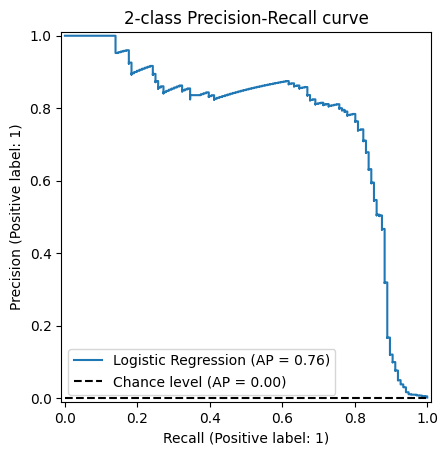

In [69]:
print('Train Data: ')
print(confusion_matrix(y_train_rus, logreg_pred_train ))
print(classification_report(y_train_rus, logreg_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,logreg_pred_test ))
print(classification_report(y_test,logreg_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## cross-validation on undersampled logistic regression model

In [70]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

params = {"C" : [0.01, 0.1, 1, 10, 100, 1000 ]}

model1_logreg_cv = GridSearchCV(estimator=LogisticRegression(solver='saga'), param_grid = params, cv=folds, verbose=1, return_train_score=True)

model1_logreg_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=1)

In [73]:
cv_results = pd.DataFrame(model1_logreg_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021897,0.005589,0.011475,0.011260,0.01,{'C': 0.01},0.951049,0.937063,0.922535,0.915493,...,0.929735,0.012763,6,0.938489,0.940246,0.933333,0.935088,0.936842,0.936800,0.002436
1,0.021580,0.006856,0.004303,0.002458,0.10,{'C': 0.1},0.944056,0.937063,0.950704,0.929577,...,0.941013,0.007163,1,0.938489,0.949033,0.947368,0.945614,0.938596,0.943820,0.004443
2,0.016812,0.001606,0.004401,0.007400,1.00,{'C': 1},0.951049,0.937063,0.950704,0.915493,...,0.939594,0.013103,2,0.938489,0.950791,0.947368,0.943860,0.938596,0.943821,0.004835
3,0.019874,0.004428,0.000410,0.000819,10.00,{'C': 10},0.951049,0.937063,0.950704,0.915493,...,0.939594,0.013103,2,0.938489,0.950791,0.947368,0.943860,0.938596,0.943821,0.004835
4,0.020538,0.002892,0.001868,0.001531,100.00,{'C': 100},0.951049,0.937063,0.950704,0.915493,...,0.939594,0.013103,2,0.938489,0.950791,0.947368,0.943860,0.938596,0.943821,0.004835
5,0.020024,0.006067,0.000000,0.000000,1000.00,{'C': 1000},0.951049,0.937063,0.950704,0.915493,...,0.939594,0.013103,2,0.938489,0.949033,0.947368,0.945614,0.938596,0.943820,0.004443


In [72]:
model1_logreg_cv.best_estimator_

LogisticRegression(C=0.1, solver='saga')

In [75]:
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_rus, y_train_rus)

LogisticRegression(C=0.1)

Train Data: 
[[351   5]
 [ 33 323]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       356
           1       0.98      0.91      0.94       356

    accuracy                           0.95       712
   macro avg       0.95      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712

****************************************************************************************************
Test Data: 
[[83070  2237]
 [   11   125]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.92      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443

****************************************************************************************************
AUPRC CURVE:


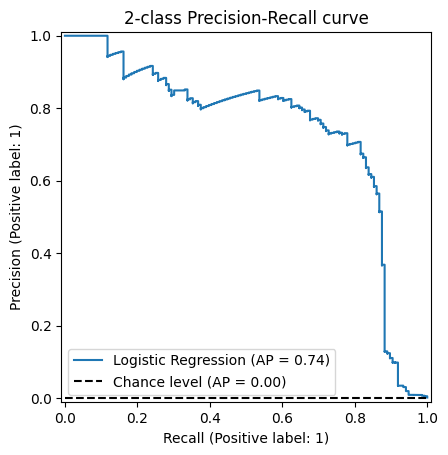

In [76]:
logreg_pred_test = logreg.predict(X_test)
logreg_pred_train = logreg.predict(X_train_rus)

print('Train Data: ')
print(confusion_matrix(y_train_rus, logreg_pred_train ))
print(classification_report(y_train_rus, logreg_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,logreg_pred_test ))
print(classification_report(y_test,logreg_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## XGB model over undersampled data set.

In [77]:
xgb_rus = XGBClassifier()

xgb_rus.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Data: 
[[356   0]
 [  0 356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

****************************************************************************************************
Test Data: 
[[82303  3004]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

****************************************************************************************************
AUPRC CURVE:


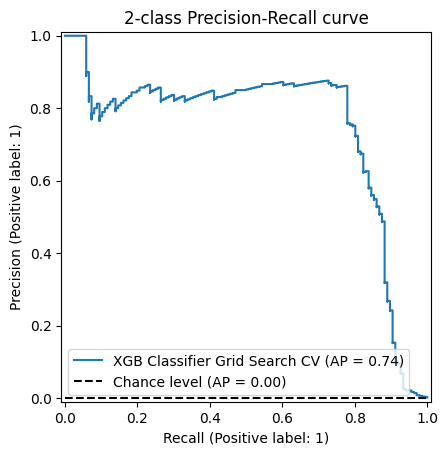

In [82]:
xgb_class_pred_test = xgb_rus.predict(X_test)
xgb_class_pred_train =xgb_rus.predict(X_train_rus)

print('Train Data: ')
print(confusion_matrix(y_train_rus, xgb_class_pred_train ))
print(classification_report(y_train_rus, xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test, xgb_class_pred_test ))
print(classification_report(y_test, xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_rus, X_test, y_test, name="XGB Classifier Grid Search CV", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [83]:
folds = 3

param_grid = {'learning_rate': [0.1,0.2,0.6],
             'max_depth': [3,5,7,9],
             'subsample': [0.3,0.6,0.9]}

xgb_model = XGBClassifier(n_estimators=200)

model_cv = GridSearchCV(
    estimator=xgb_model,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv=folds,
    verbose=1,
    return_train_score=True
)

model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.6],
                         'max_depth': [3, 5, 7, 9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [84]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.6}

In [85]:
xgb_rus = XGBClassifier(learning_rate= 0.1, max_depth= 7, subsample= 0.6)

xgb_rus.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Data: 
[[356   0]
 [  0 356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

****************************************************************************************************
Test Data: 
[[82303  3004]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

****************************************************************************************************
AUPRC CURVE:


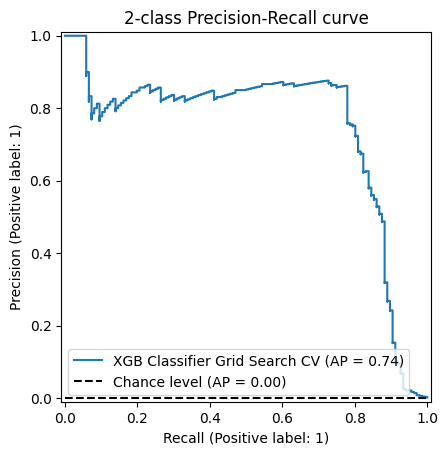

In [86]:
xgb_class_pred_test = xgb_rus.predict(X_test)
xgb_class_pred_train =xgb_rus.predict(X_train_rus)

print('Train Data: ')
print(confusion_matrix(y_train_rus, xgb_class_pred_train ))
print(classification_report(y_train_rus, xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test, xgb_class_pred_test ))
print(classification_report(y_test, xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_rus, X_test, y_test, name="XGB Classifier Grid Search CV", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## OVER SAMPLING: 

In [87]:
from imblearn.over_sampling  import RandomOverSampler

In [88]:
ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [89]:
y_train_ros.value_counts()

Class
0        199008
1        199008
Name: count, dtype: int64

In [90]:
logreg = LogisticRegression()

logreg.fit(X_train_ros,y_train_ros)

LogisticRegression()

Train Data: 
[[193335   5673]
 [ 15767 183241]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    199008
           1       0.97      0.92      0.94    199008

    accuracy                           0.95    398016
   macro avg       0.95      0.95      0.95    398016
weighted avg       0.95      0.95      0.95    398016

****************************************************************************************************
Test Data: 
[[82860  2447]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

****************************************************************************************************
AUPRC CURVE:


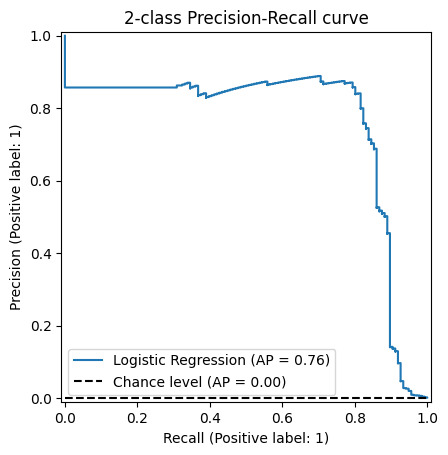

In [91]:
logreg_pred_test = logreg.predict(X_test)
logreg_pred_train = logreg.predict(X_train_ros)
print('Train Data: ')
print(confusion_matrix(y_train_ros, logreg_pred_train ))
print(classification_report(y_train_ros, logreg_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,logreg_pred_test ))
print(classification_report(y_test,logreg_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

params = {"C" : [0.01, 0.1, 1, 10, 100, 1000 ]}

model1_logreg_cv = GridSearchCV(estimator=LogisticRegression(solver='saga'), param_grid = params, cv=folds, verbose=1, return_train_score=True)

model1_logreg_cv.fit(X_train_ros, y_train_ros)

In [ ]:
logreg = LogisticRegression(c=)

logreg.fit(X_train_ros,y_train_ros)

In [ ]:
logreg_pred_test = logreg.predict(X_test)
logreg_pred_train = logreg.predict(X_train_ros)
print('Train Data: ')
print(confusion_matrix(y_train_ros, logreg_pred_train ))
print(classification_report(y_train_ros, logreg_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test,logreg_pred_test ))
print(classification_report(y_test,logreg_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    logreg, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Over sampling with XGBOOST

In [93]:
xgb_ros = XGBClassifier()

xgb_ros.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Data: 
[[191901   7107]
 [     0 199008]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    199008
           1       0.97      1.00      0.98    199008

    accuracy                           0.98    398016
   macro avg       0.98      0.98      0.98    398016
weighted avg       0.98      0.98      0.98    398016

****************************************************************************************************
Test Data: 
[[82303  3004]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443

****************************************************************************************************
AUPRC CURVE:


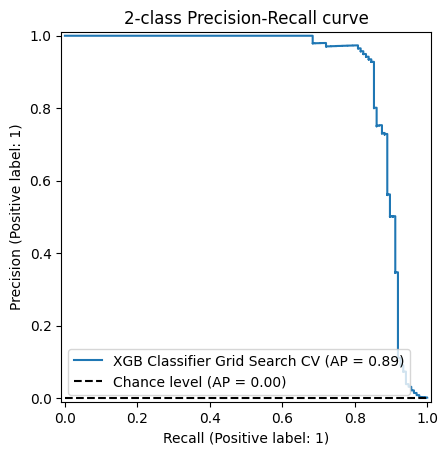

In [94]:
xgb_class_pred_test = xgb_ros.predict(X_test)
xgb_class_pred_train =xgb_ros.predict(X_train_ros)

print('Train Data: ')
print(confusion_matrix(y_train_ros, xgb_class_pred_train ))
print(classification_report(y_train_ros, xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test, xgb_class_pred_test ))
print(classification_report(y_test, xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_ros, X_test, y_test, name="XGB Classifier Grid Search CV", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [95]:
folds = 3

param_grid = {'learning_rate': [0.1,0.01,0.001],
             'max_depth': [3,5,7,9],
             'subsample': [0.3,0.6,0.9]}

xgb_model = XGBClassifier(n_estimators=200)

model_cv = GridSearchCV(
    estimator=xgb_model,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv=folds,
    verbose=1,
    return_train_score=True
)

model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [96]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9}

In [97]:
xgb_ros = XGBClassifier(learning_rate=0.1 , max_depth=7 , subsample=0.9 )

xgb_ros.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Data: 
[[198991     17]
 [     0 199008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      1.00      1.00    199008

    accuracy                           1.00    398016
   macro avg       1.00      1.00      1.00    398016
weighted avg       1.00      1.00      1.00    398016

****************************************************************************************************
Test Data: 
[[85291    16]
 [   20   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

****************************************************************************************************
AUPRC CURVE:


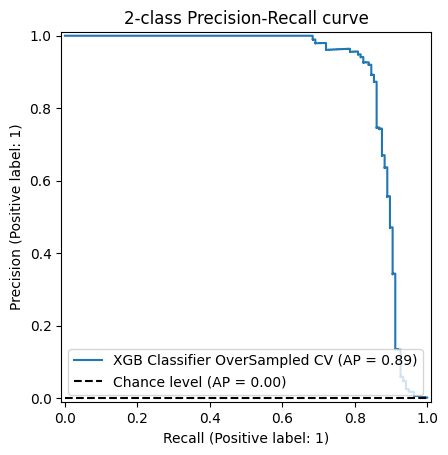

In [99]:
xgb_class_pred_test = xgb_ros.predict(X_test)
xgb_class_pred_train =xgb_ros.predict(X_train_ros)

print('Train Data: ')
print(confusion_matrix(y_train_ros, xgb_class_pred_train ))
print(classification_report(y_train_ros, xgb_class_pred_train ))

print('*'*100)

print('Test Data: ')
print(confusion_matrix(y_test, xgb_class_pred_test ))
print(classification_report(y_test, xgb_class_pred_test ))

print('*'*100)

print('AUPRC CURVE:')

display = PrecisionRecallDisplay.from_estimator(
    xgb_ros, X_test, y_test, name="XGB Classifier OverSampled CV", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")